# Shapley Values Analysis

In [126]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [127]:
df = pd.read_csv("../processed_data/2018_Clusters_Ratios_AF_All.csv")
df = df.set_index('Name')

In [128]:
df

,Net cash flow / Change in cash,Average Payables,Average Receivables,Current Ratio,SG&A to Revenue,Days Payable Outstanding,Days Inventory Outstanding,EBIT per Revenue,Debt to Assets,Debt to Equity,Payout Ratio,Return on Equity,R&D to Revenue,Price-to-Earnings Ratio,Dividend Yield,cluster
Name,,,,,,,,,,,,,,,,
Comcast Corporation,0.118923,0.473944,1.638677,-0.356853,-0.044034,-0.066821,-0.026435,0.050575,0.337676,0.055796,0.010642,-0.015926,-0.049350,-0.108544,0.033407,0
"Kinder Morgan, Inc.",0.942280,0.012576,0.094058,-0.363241,-0.060170,-0.066377,-0.027191,0.051445,0.396621,0.022762,0.152212,-0.015927,-0.049350,-0.016143,0.213109,1
Intel Corporation,-0.113235,0.160323,0.946998,-0.185465,-0.058846,-0.070255,-0.027910,0.051786,-0.141131,-0.032390,-0.007532,-0.015925,-0.046837,-0.136551,0.021842,0
"Micron Technology, Inc.",0.437831,0.206949,0.665927,0.007278,-0.060563,-0.061652,-0.022345,0.053225,-0.340499,-0.047726,-0.057847,-0.015925,-0.048425,-0.191694,-0.205898,2
General Electric Company,-2.818243,0.982517,6.219718,-0.187800,-0.057501,-0.064205,-0.018289,0.047457,0.114367,0.186120,-0.084821,-0.015931,-0.049350,-0.231417,0.246024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Willamette Valley Vineyards, Inc.",0.013329,-0.084326,-0.173367,0.467234,-0.049720,-0.067693,-0.027449,0.050511,-0.282157,-0.045388,-0.057847,-0.015927,-0.049350,-0.059390,-0.205898,5
"Xcel Brands, Inc.",0.014151,-0.084251,-0.171965,-0.231096,-0.043934,-0.061556,-0.013858,0.049769,-0.270288,-0.043898,-0.057847,-0.015927,-0.049350,-0.057434,-0.205898,2
"Yield10 Bioscience, Inc.",0.011041,-0.084476,-0.173716,0.207870,0.167490,-0.055292,-0.015336,-0.104876,0.447922,0.024684,-0.057847,-0.015936,0.063150,-0.231417,-0.205898,1


In [129]:
np.random.seed(0)

# The target variable is 'cluster'.
Y = df['cluster']
X = df.drop(['cluster'], axis=1)
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [130]:
Y

Name
Comcast Corporation                  0
Kinder Morgan, Inc.                  1
Intel Corporation                    0
Micron Technology, Inc.              2
General Electric Company             3
                                    ..
Willamette Valley Vineyards, Inc.    5
Xcel Brands, Inc.                    2
Yield10 Bioscience, Inc.             1
ZK International Group Co., Ltd.     2
Zymeworks Inc.                       5
Name: cluster, Length: 3487, dtype: int64

In [131]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, Y_train);

from sklearn.metrics import confusion_matrix

test_pred = rf.predict(X_test)
confusion_matrix(test_pred, Y_test)

array([[ 22,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 174,   3,   0,   0,   5,   2,   1,   0,   1,   0,   0,   0],
       [  1,   6, 291,   0,   1,   1,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0,  19,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   1,   0,   0,  70,   0,   1,   1,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   2,  45,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25,   0,   2,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

#### Shap Summary Plot (Stacked)

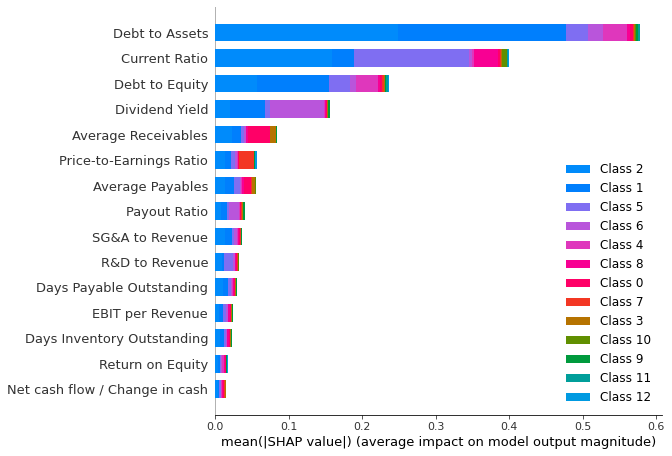

In [132]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train)

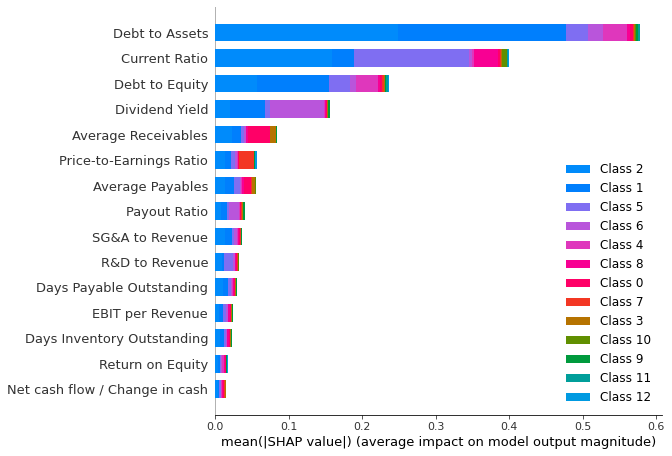

In [134]:
fig = shap.summary_plot(shap_values, X_train, plot_type="bar", show=False);
plt.savefig('../processed_data/shap_plots/shapley_all.png', bbox_inches='tight')

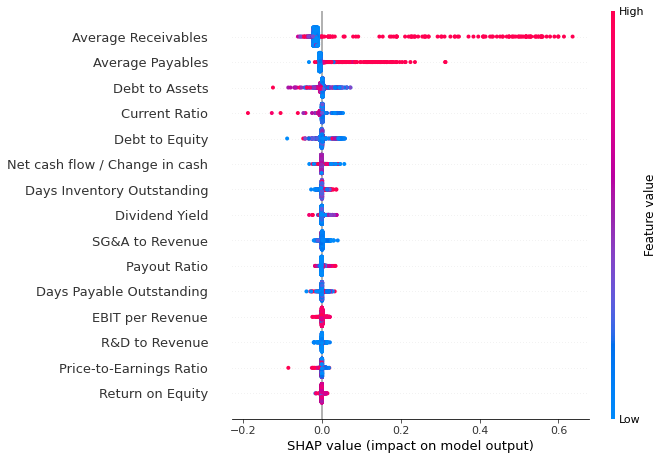

In [135]:
shap.summary_plot(shap_values[0], X_train)

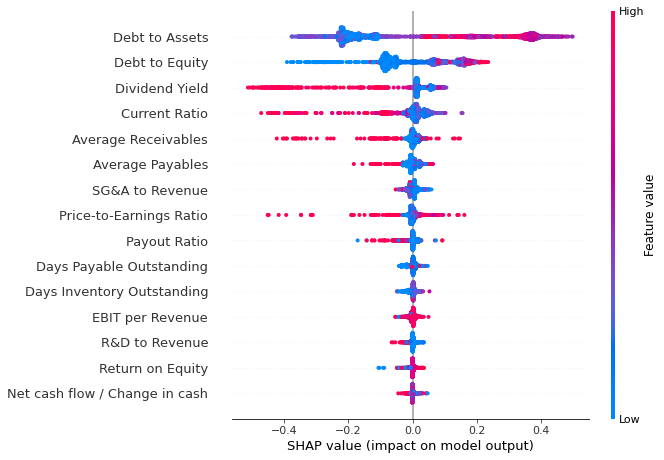

In [136]:
shap.summary_plot(shap_values[1], X_train)

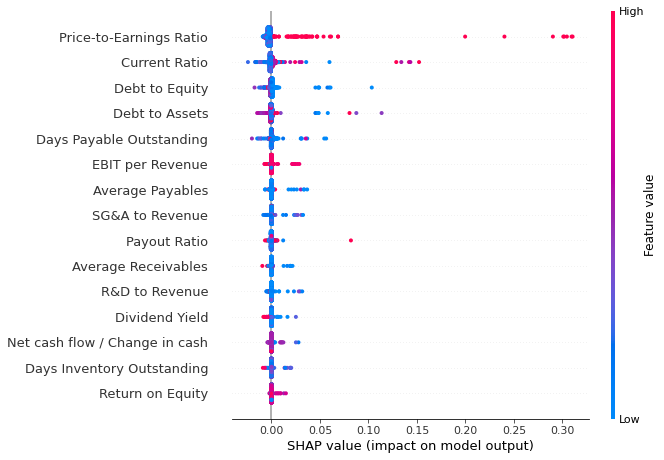

In [137]:
# Saves all the shapley value summary plots
for val in range(len(shap_values)):
    plt.clf()
    fig = shap.summary_plot(shap_values[val], X_train, show=False);
    plt.savefig('../processed_data/shap_plots/shapcluster' + str(val) + '.png', bbox_inches='tight')

In [138]:
def getAttributeHighLowImpact(cluster):
    attrsorted = X_train.columns[np.argsort(np.abs(shap_values[cluster]).mean(0))].tolist()
    attrsorted.reverse();
    sorted_shap_values = shap_values[cluster][:, np.argsort(np.abs(shap_values[cluster]).mean(0))]
    sorted_shap_values = np.fliplr(sorted_shap_values)
    X_train_sorted = X_train[attrsorted]
    
    sums = [0] * len(sorted_shap_values[0]);
    lengths = [0] * len(sorted_shap_values[0]);
    for value in range(len(sorted_shap_values)):
        for attr in range(len(sorted_shap_values[value])):
            if (sorted_shap_values[value][attr] > 0):
                lengths[attr] += 1;
                sums[attr] += X_train_sorted.iloc[value, attr];
    average = [0] * len(sorted_shap_values[0]);
    for s in range(len(sums)):
        average[s] = sums[s] / lengths[s];
    return attrsorted, average

### Output csv file with importances

In [139]:
output = [];
for cluster in range(len(shap_values)):
    impact = getAttributeHighLowImpact(cluster)
    outputAttr = impact[0][:3] # pick top three attributes
    averageAttr = impact[1][:3]
    averageAttr = list(map(lambda averageAttr : ("High" if averageAttr > 0 else "Low"), averageAttr)) # Clasify whether each attribtue is High or Low
    outputObj = list(zip(outputAttr, averageAttr))
    output.append(outputObj)

In [140]:
output

[[('Average Receivables', 'High'),
  ('Average Payables', 'High'),
  ('Debt to Assets', 'Low')],
 [('Debt to Assets', 'High'),
  ('Debt to Equity', 'High'),
  ('Dividend Yield', 'Low')],
 [('Debt to Assets', 'Low'),
  ('Current Ratio', 'Low'),
  ('Debt to Equity', 'Low')],
 [('Average Receivables', 'High'),
  ('Average Payables', 'High'),
  ('Debt to Assets', 'Low')],
 [('Debt to Assets', 'High'),
  ('Debt to Equity', 'Low'),
  ('Return on Equity', 'Low')],
 [('Current Ratio', 'High'),
  ('Debt to Assets', 'Low'),
  ('Debt to Equity', 'Low')],
 [('Dividend Yield', 'High'),
  ('Debt to Assets', 'High'),
  ('Payout Ratio', 'High')],
 [('Price-to-Earnings Ratio', 'High'),
  ('Payout Ratio', 'High'),
  ('Debt to Equity', 'Low')],
 [('Current Ratio', 'High'),
  ('Debt to Assets', 'Low'),
  ('Debt to Equity', 'Low')],
 [('Payout Ratio', 'Low'),
  ('Dividend Yield', 'High'),
  ('Debt to Assets', 'High')],
 [('Current Ratio', 'High'),
  ('Debt to Assets', 'High'),
  ('EBIT per Revenue', 'High'

In [141]:
import json
with open('../processed_data/2018_Clusters_All_Factors.json', 'w') as outfile:
    json.dump(output, outfile)